# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

## Create Model and Load Trained Weights

## Run Object Detection

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [2]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt


In [3]:
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/food/"))  # To find local version
import food

Using TensorFlow backend.


In [4]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [5]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_food_0001.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [6]:
COCO_MODEL_PATH=r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\logs\food20210830T2108\mask_rcnn_food_0030.h5'

In [7]:
class InferenceConfig(food.FoodConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [8]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [9]:
model.load_weights(COCO_MODEL_PATH, by_name=True)







Re-starting from epoch 30


In [10]:
class_names = ['cake', 'burger', 'french_fries', 'chicken',
               'toast', 'egg', 'pizza', 'cookie', 'hot dog', 'steak']


In [11]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\fried_chicken\chicken_13.jpg')

In [12]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\fried_chicken\chicken_2.jpg')

In [13]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\cookies\cookies_20.jpg')

In [14]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\fries_2.jpg')

In [15]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\combinations\combine_10.jpg')

In [16]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\new_chicken_14.jpg')

In [17]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\steak_3.jpg')

In [18]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\egg_2.jpg')

Processing 1 images
image                    shape: (174, 290, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 22)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Total Objects found 2
egg
chicken
total calories in the food = 434


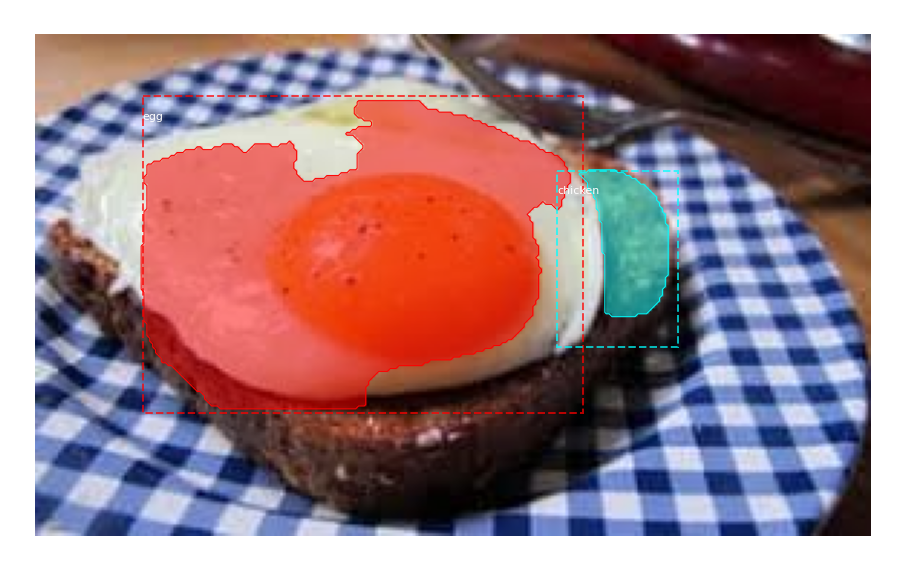

In [19]:
results = model.detect([image], verbose=1)
global final_set
# Visualize results
r = results[0]
classes= r['class_ids']
print("Total Objects found", len(classes))
p = []
for i in range(len(classes)):
    p.append(class_names[classes[i]])
    #print(class_names[classes[i]])
new_p = list(set(p))


file=open(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\categories.txt','w') 
file.write(str(new_p)); 
file.close() 
#for n in new_p:
    #print(n)    
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])

steak
steak


## calories calculation

In [175]:
food_cal.shape

(940,)

In [176]:
food_cal=pd.DataFrame(food_cal,columns=['image_food_calories'])

In [160]:
watch_data=pd.read_excel(r'C:\Users\Administrator\Downloads\dailyActivity_merged R2.xlsx',sheet_name='dailyActivity_merged')

In [177]:
watch_data=pd.concat([watch_data,food_cal],axis=1)

In [179]:
watch_data.shape

(940, 20)

In [180]:
watch_data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'Calorie consumption/day', 'Net consumed Cal/day',
       'Variation from Optimum Cal.', 'Target Class', 'image_food_calories'],
      dtype='object')

In [183]:
watch_data.image_food_calories

0      665
1      405
2      494
3      290
4      340
      ... 
935    420
936    535
937    300
938    444
939    434
Name: image_food_calories, Length: 940, dtype: int32

In [30]:
j=[]
    for i [int(random.uniform(1, 10)) for i in range(0, 5)]:
        j.append(data[i])
    food_calories=np.sum(j)

NameError: name 'watch_data' is not defined

In [ ]:
lst = [int(random.uniform(1, 10)) for i in range(0, 5)]